# Ambang Batas

# Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Membaca Gambar

In [2]:
image_path = 'cek_rgb.jpeg'
image = cv2.imread(image_path)

## Mengkonversi dari BGR ke RGB

In [3]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
baris, kolom, _ = image_rgb.shape

## Mengkontraskan Citra

In [4]:
alpha = 1.4  # Peningkatan kontras untuk kejelasan
citra_kontras = np.zeros((baris, kolom, 3))

for x in range(baris):
    for y in range(kolom):
        gyx = image_rgb[x, y] * alpha
        citra_kontras[x, y] = np.clip(gyx, 0, 255)

citra_kontras = citra_kontras.astype(np.uint8)

## Fungsi untuk menghasilkan citra biner berdasarkan kategori

In [9]:
def generate_binary_image(citra_kontras, kategori):
    # Threshold untuk masing-masing kanal warna
    blue_thresh = 130
    red_thresh = 130
    green_thresh = 130
    
    # Mendapatkan kanal warna
    blue_channel = citra_kontras[:, :, 2]
    green_channel = citra_kontras[:, :, 1]
    red_channel = citra_kontras[:, :, 0]
    
    # Inisialisasi citra biner
    binary_image = np.zeros((baris, kolom), dtype=np.uint8)

    # Masking berdasarkan kategori
    if kategori == "none":
        pass  # Semua tetap hitam

    elif kategori == "blue":
        mask = (blue_channel > blue_thresh) & (red_channel <= red_thresh) & (green_channel <= green_thresh)
        binary_image[mask] = 255

    elif kategori == "red-blue":
        mask = ((blue_channel > blue_thresh) & (red_channel <= red_thresh) & (green_channel <= green_thresh)) | \
               ((red_channel > red_thresh) & (blue_channel <= blue_thresh) & (green_channel <= green_thresh))
        binary_image[mask] = 255

    elif kategori == "red-green-blue":
        green_thresh_hijau = 110
        mask_blue = (blue_channel > blue_thresh) & (red_channel <= red_thresh) & (green_channel <= green_thresh)
        mask_red = (red_channel > red_thresh) & (blue_channel <= blue_thresh) & (green_channel <= green_thresh)
        mask_green = (green_channel > green_thresh_hijau) & (red_channel <= red_thresh) & (blue_channel <= blue_thresh)
        mask = mask_blue | mask_red | mask_green
        binary_image[mask] = 255

    return binary_image

## Menampilkan Semua Hasil

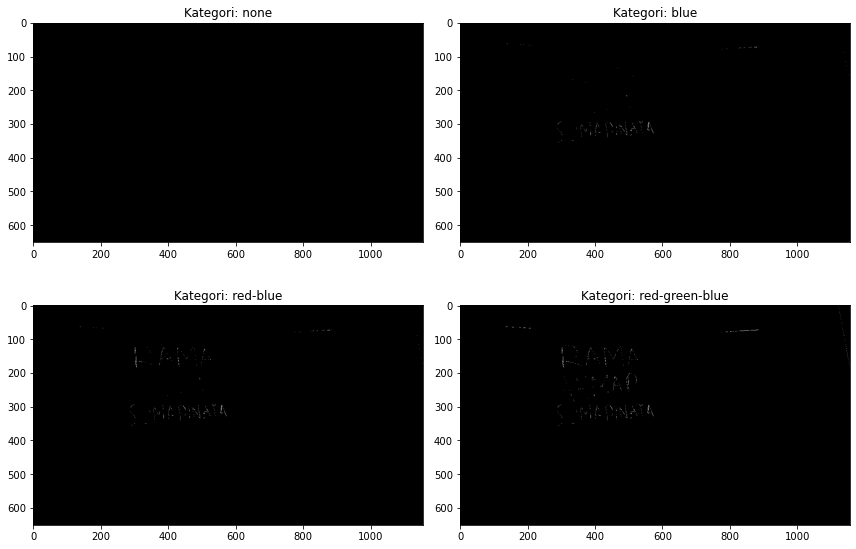

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Kategori: none
binary_none = generate_binary_image(citra_kontras, "none")
axes[0, 0].imshow(binary_none, cmap='gray')
axes[0, 0].set_title("Kategori: none")

# Kategori: blue
binary_blue = generate_binary_image(citra_kontras, "blue")
axes[0, 1].imshow(binary_blue, cmap='gray')
axes[0, 1].set_title("Kategori: blue")

# Kategori: red-blue
binary_red_blue = generate_binary_image(citra_kontras, "red-blue")
axes[1, 0].imshow(binary_red_blue, cmap='gray')
axes[1, 0].set_title("Kategori: red-blue")

# Kategori: red-green-blue
binary_rgb = generate_binary_image(citra_kontras, "red-green-blue")
axes[1, 1].imshow(binary_rgb, cmap='gray')
axes[1, 1].set_title("Kategori: red-green-blue")

plt.tight_layout()
plt.show()